In [114]:
import os
import sqlite3
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
from tqdm import tqdm
import pickle as pkl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from userinfo import YOUR_NAME, START_DAY, END_DAY

%matplotlib inline
"""GOALS"""
# Cumulative Messaging per person
# Number of people messaged per day
# Total Sent/Received

'GOALS'

In [115]:
print(YOUR_NAME, START_DAY, END_DAY)
Num_People_To_Graph = 10
# START_DAY = "8/20/16"
# END_DAY = "6/1/18"
if(not os.path.exists("graphs")):
    os.mkdir("graphs")

Armaan Sethi 1/1/18 6/1/18


In [116]:
convos = pkl.load(open("messages.pkl", 'rb'))
#0: id (string)
#1: name (string)
#2: num_messages (dict name:num_messages)
#3: datetime (list of datetime objs)
#4: text (list of messages)
#5: who (list of names)
#6: group (bool)
print("Total Conversations: ", len(convos), "\n")

Total Conversations:  676 



In [117]:
start_day = datetime.strptime(START_DAY, "%m/%d/%y")
end_day = datetime.strptime(END_DAY, "%m/%d/%y")
num_days = (end_day - start_day).days
num_days

151

In [118]:
df_mpd = pd.DataFrame()
df_mpd_me = pd.DataFrame()
df_mpt = pd.DataFrame()
# df_mpt.columns = map(str, range(24))

date_list = [start_day.date() + timedelta(days=x) for x in range(0, num_days+1)]
for i in range(len(convos)):
    messages_per_day = []
    messages_per_day_me = []
    time_dict = dict.fromkeys(map(str,range(24)),0)

    if(convos[i][6] == False):# not group chat
        num_messages = len(convos[i][3]) 
        
        total_messages = 0
        total_messages_me = 0
        prev_total_messages = 0
        prev_total_messages_me = 0
        for day in date_list:
            while(total_messages < num_messages and convos[i][3][num_messages - total_messages - 1].date() < day):
                total_messages+=1 #messages until day
                if(convos[i][5][num_messages - total_messages - 1] == YOUR_NAME):
                    total_messages_me += 1
                if(day != date_list[0]):#not first day
                    time_dict[str(convos[i][3][num_messages - total_messages - 1].hour)]+=1
                    
            messages_per_day.append(total_messages - prev_total_messages) #num messages per day
            messages_per_day_me.append(total_messages_me - prev_total_messages_me) #num messages by me per day
            prev_total_messages = total_messages #update total
            prev_total_messages_me = total_messages_me #update total
#         print(time_dict)
        if(sum(messages_per_day[1:]) > 0): #no need to add columns with no messages
            df_mpd[convos[i][1]] = messages_per_day[1:]
            df_mpd_me[convos[i][1]] = messages_per_day_me[1:]
#             time_series = 
#             time_series.name = 
            df_mpt[convos[i][1]] = pd.Series(time_dict)

            
            

df_mpd.index = date_list[:-1]
df_mpd_me.index = date_list[:-1]

df_mpd = df_mpd.reindex(sorted(df_mpd.columns), axis=1) #sort alphabetically, later sort by total messages
df_mpd_me = df_mpd_me.reindex(sorted(df_mpd_me.columns), axis = 1) 
# df_mpt = pd.DataFrame.from_dict(time_dict, orient='index')

In [119]:
df_mpd.head()#messages per day

,Abhay Donthi,Akaash Sanyal,Akash Jain,Akshay Sankar,Alec Mikell,Alyes Chen,Aman Dalal,Amogh Natu,Amogh Sharma,Ani Sankaran,...,Vignesh Balasubramaniam,Vikas Vannappagari,Vikram Aikat,Vinit Ranjan,Visrut Sudhakar,Wayne Ji,Xueyang Li,Yicheng Wang,Yingzhuo Li,Zohair Zia
2018-01-01,0,0,1,0,0,0,0,0,0,9,...,0,0,0,0,0,0,2,10,0,0
2018-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,0,0,0,0,0,0,0,0,0,1,...,0,0,0,27,0,0,1,85,0,0
2018-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,280,0,0
2018-01-05,0,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


In [120]:
df_mpd_me.head()# messages by me per day

,Abhay Donthi,Akaash Sanyal,Akash Jain,Akshay Sankar,Alec Mikell,Alyes Chen,Aman Dalal,Amogh Natu,Amogh Sharma,Ani Sankaran,...,Vignesh Balasubramaniam,Vikas Vannappagari,Vikram Aikat,Vinit Ranjan,Visrut Sudhakar,Wayne Ji,Xueyang Li,Yicheng Wang,Yingzhuo Li,Zohair Zia
2018-01-01,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,1,4,0,0
2018-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,17,0,0,1,37,0,0
2018-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,142,0,0
2018-01-05,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [121]:
%matplotlib notebook
%matplotlib notebook

In [122]:
#sort by total num messages
df_mpd = df_mpd[df_mpd.sum().sort_values(ascending = False).index]
df_mpd.head()

,Mohamed Lansari,Alec Mikell,Vamsi Varanasi,August Ning,Yicheng Wang,Danielle du Preez,Shreya Patel,Nikhil Komirisetti,Anna Hattle,Harshal Singh,...,Danila Chenchik,Ethan Holland,Rashmi Patwardhan,Brian Rhee,Esther Lee,Caroline Wang,Cassidy Soutter,Nikhil Kaul,Joe Choo-Choy,Julie Son
2018-01-01,0,0,2,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-02,0,0,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,10,0,49,0,85,6,0,0,0,38,...,0,0,0,0,0,0,0,0,0,0
2018-01-04,0,0,33,6,280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-05,0,0,22,0,0,2,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [123]:
#messages per person per day
df_mpp_pd = df_mpd.copy().cumsum(axis=0)
df_mpp_pd = df_mpp_pd.iloc[:,:Num_People_To_Graph]
df_mpp_pd.head()

,Mohamed Lansari,Alec Mikell,Vamsi Varanasi,August Ning,Yicheng Wang,Danielle du Preez,Shreya Patel,Nikhil Komirisetti,Anna Hattle,Harshal Singh
2018-01-01,0,0,2,0,10,0,0,0,0,0
2018-01-02,0,0,12,0,10,0,0,0,0,0
2018-01-03,10,0,61,0,95,6,0,0,0,38
2018-01-04,10,0,94,6,375,6,0,0,0,38
2018-01-05,10,0,116,6,375,8,0,0,0,42


<IPython.core.display.Javascript object>


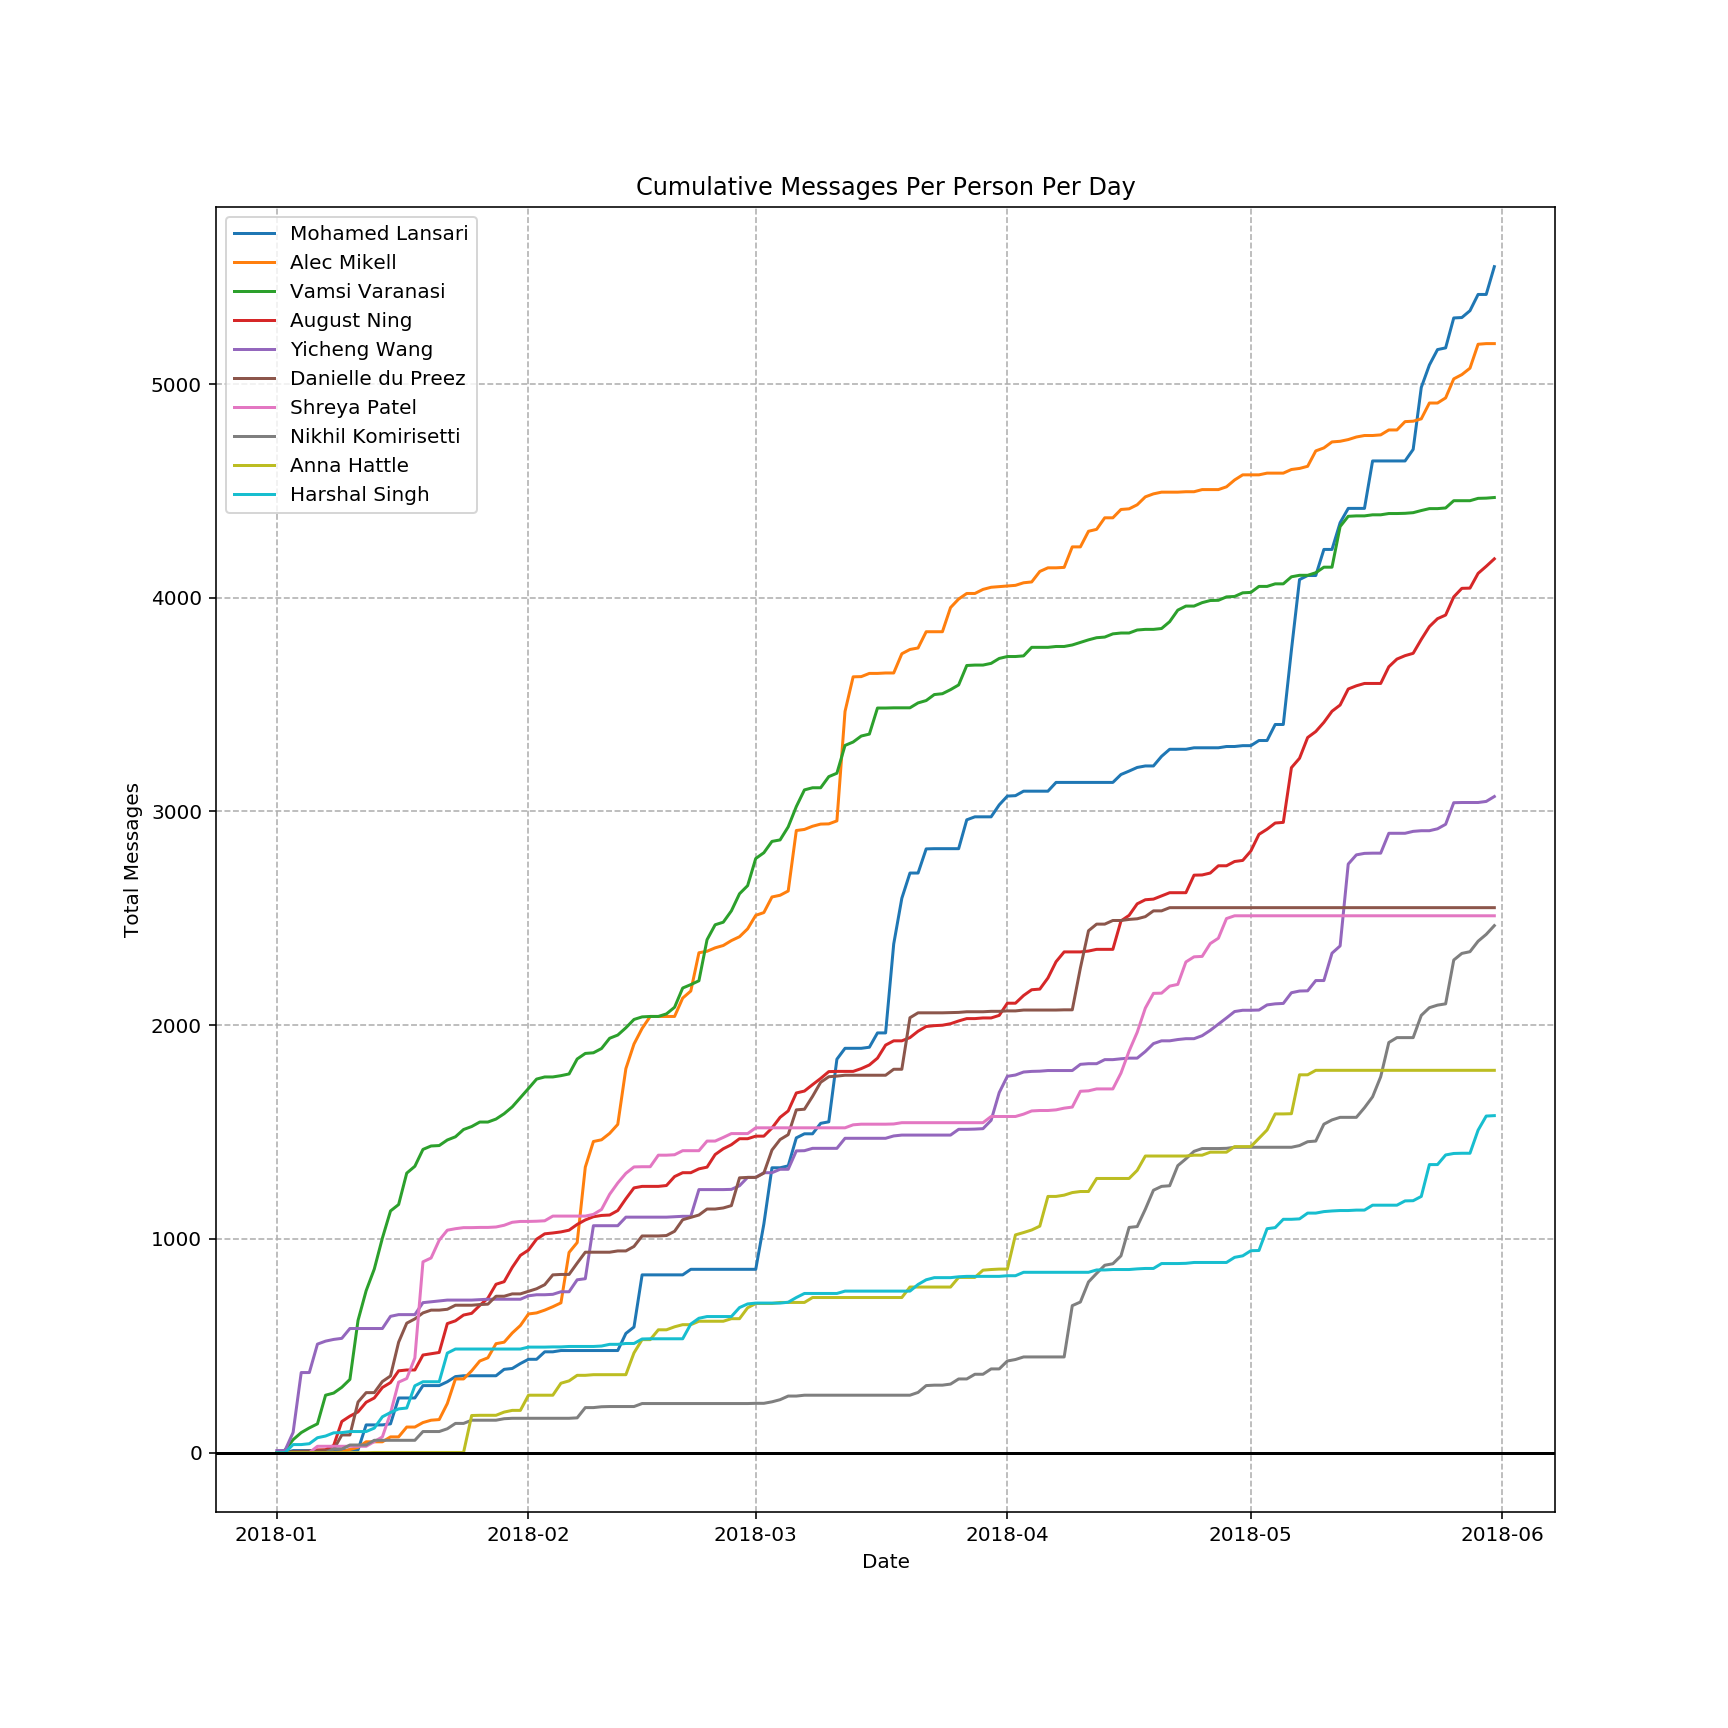

In [124]:
plt_mpp_pd = df_mpp_pd.plot(title = "Cumulative Messages Per Person Per Day", figsize=(12,12))
plt_mpp_pd.set_ylabel("Total Messages")
plt_mpp_pd.set_xlabel("Date")
plt_mpp_pd.grid(True, linestyle='--')
plt_mpp_pd.axhline(y=0, color='k')

plt_mpp_pd.get_figure().savefig("graphs/cumulative_messaging_by_day.png", bbox_inches='tight')


In [125]:
#total messages per day
df_tm_pd = df_mpd.iloc[:].sum(axis = 1)
df_tm_pd.head()

2018-01-01     32
2018-01-02     28
2018-01-03    234
2018-01-04    342
2018-01-05     79
dtype: int64

<IPython.core.display.Javascript object>


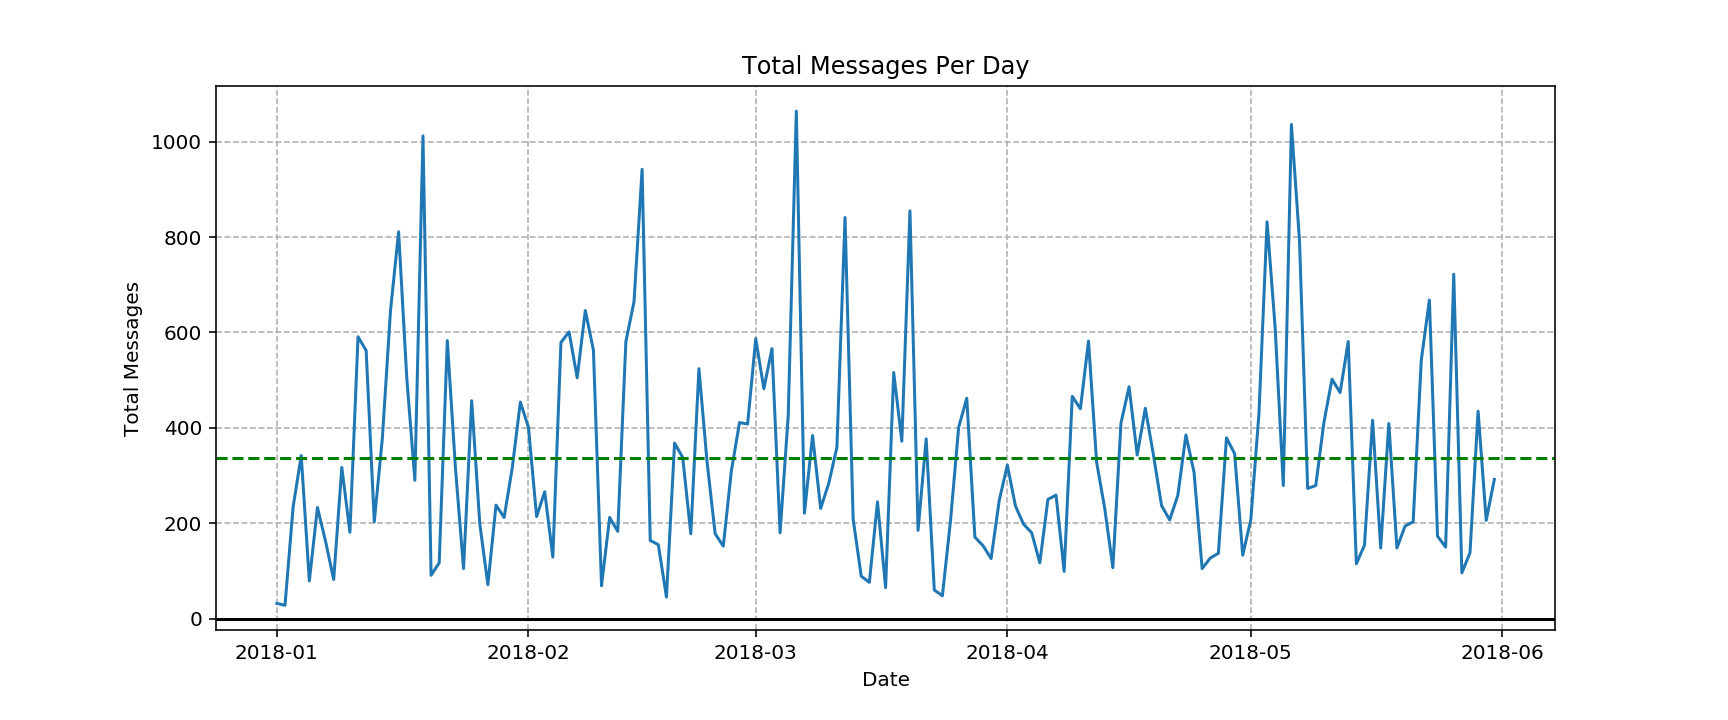

In [126]:
import matplotlib.dates as mdates

plt_tm_pd = plt.figure()

plt_tm_pd = df_tm_pd.plot(title = "Total Messages Per Day", figsize=(12,5))
plt_tm_pd.set_ylabel("Total Messages")
plt_tm_pd.set_xlabel("Date")
plt_tm_pd.grid(True, linestyle='--')
plt_tm_pd.axhline(y=0, color='k')
plt_tm_pd.axhline(y=np.mean(df_tm_pd), color='g', linestyle='--')

plt_tm_pd.get_figure().savefig("graphs/total_messages_per_day.png", bbox_inches='tight')

In [127]:
#num people messaged per day
df_ppl_pd = (df_mpd != 0).astype(int).sum(axis = 1)
df_ppl_pd.head()

2018-01-01     7
2018-01-02     3
2018-01-03    12
2018-01-04     7
2018-01-05     7
dtype: int64

<IPython.core.display.Javascript object>


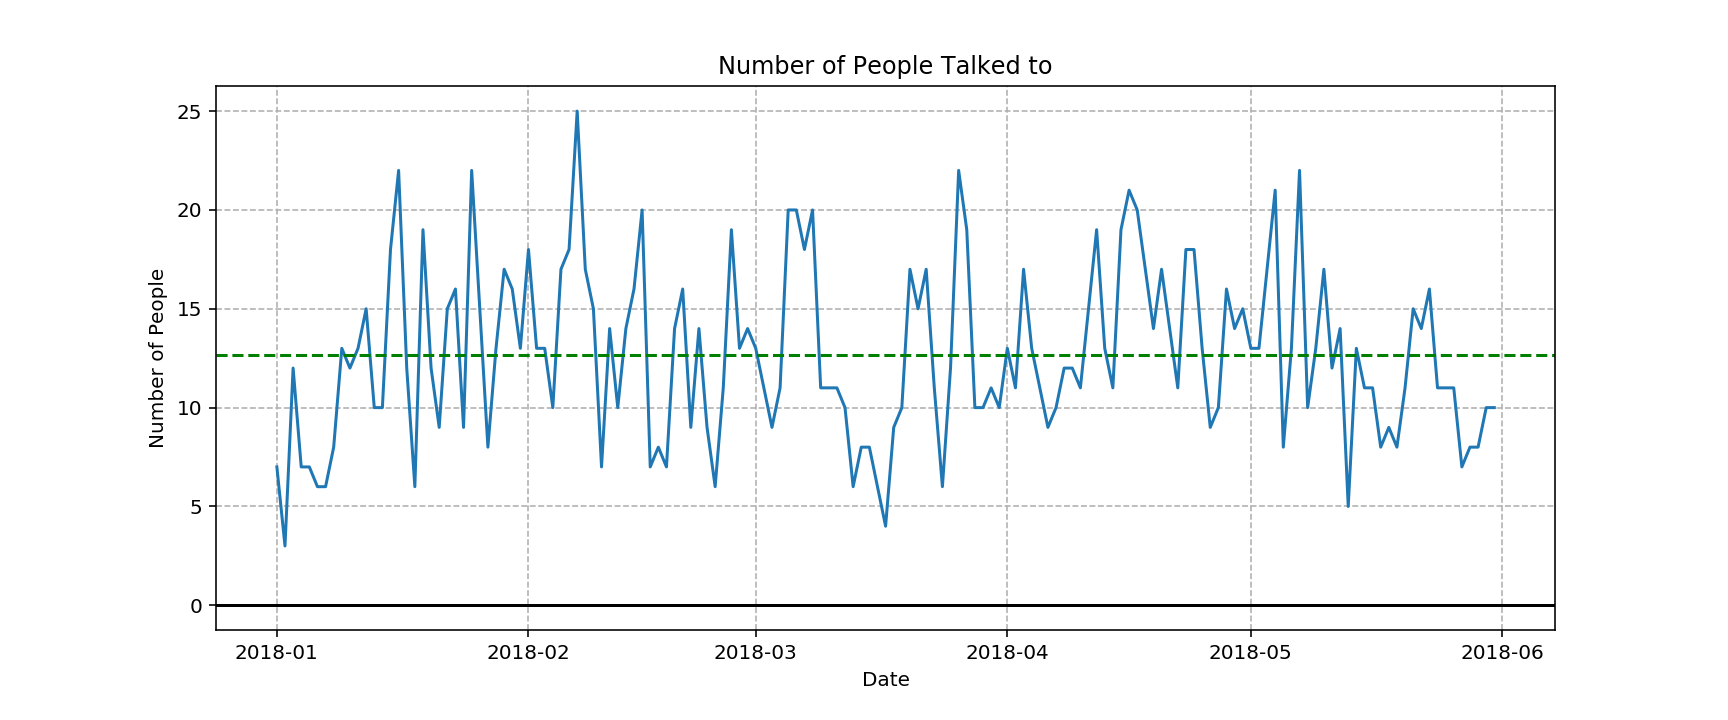

In [128]:
plt_ppl_pd = plt.figure()
plt_ppl_pd = df_ppl_pd.plot(title = "Number of People Talked to", figsize=(12,5))
plt_ppl_pd.set_ylabel("Number of People")
plt_ppl_pd.set_xlabel("Date")
plt_ppl_pd.grid(True, linestyle='--')
plt_ppl_pd.axhline(y=0, color='k')
plt_ppl_pd.axhline(y=np.mean(df_ppl_pd), color='g', linestyle = '--')

plt_ppl_pd.get_figure().savefig("graphs/num_people_talked_per_day.png", bbox_inches='tight')

In [129]:
df_mpd = df_mpd.reindex(sorted(df_mpd.columns), axis=1)#sort alphabetically again
df_mpd.head()

,Abhay Donthi,Akaash Sanyal,Akash Jain,Akshay Sankar,Alec Mikell,Alyes Chen,Aman Dalal,Amogh Natu,Amogh Sharma,Ani Sankaran,...,Vignesh Balasubramaniam,Vikas Vannappagari,Vikram Aikat,Vinit Ranjan,Visrut Sudhakar,Wayne Ji,Xueyang Li,Yicheng Wang,Yingzhuo Li,Zohair Zia
2018-01-01,0,0,1,0,0,0,0,0,0,9,...,0,0,0,0,0,0,2,10,0,0
2018-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,0,0,0,0,0,0,0,0,0,1,...,0,0,0,27,0,0,1,85,0,0
2018-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,280,0,0
2018-01-05,0,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0


In [130]:
df_total_me = pd.DataFrame()

df_total_me['sent'] = df_mpd_me.sum()
df_total_me['received'] = df_mpd.sum() - df_total_me['sent']

df_total_me = df_total_me.reindex(df_total_me.sum(axis = 1).sort_values(ascending = False).index)
df_total_me[:Num_People_To_Graph]

,sent,received
Mohamed Lansari,2787,2762
Alec Mikell,3029,2160
Vamsi Varanasi,2886,1583
August Ning,2278,1904
Yicheng Wang,1631,1439
Danielle du Preez,1375,1175
Shreya Patel,1134,1378
Nikhil Komirisetti,1293,1173
Anna Hattle,1040,749
Harshal Singh,1015,562


<IPython.core.display.Javascript object>


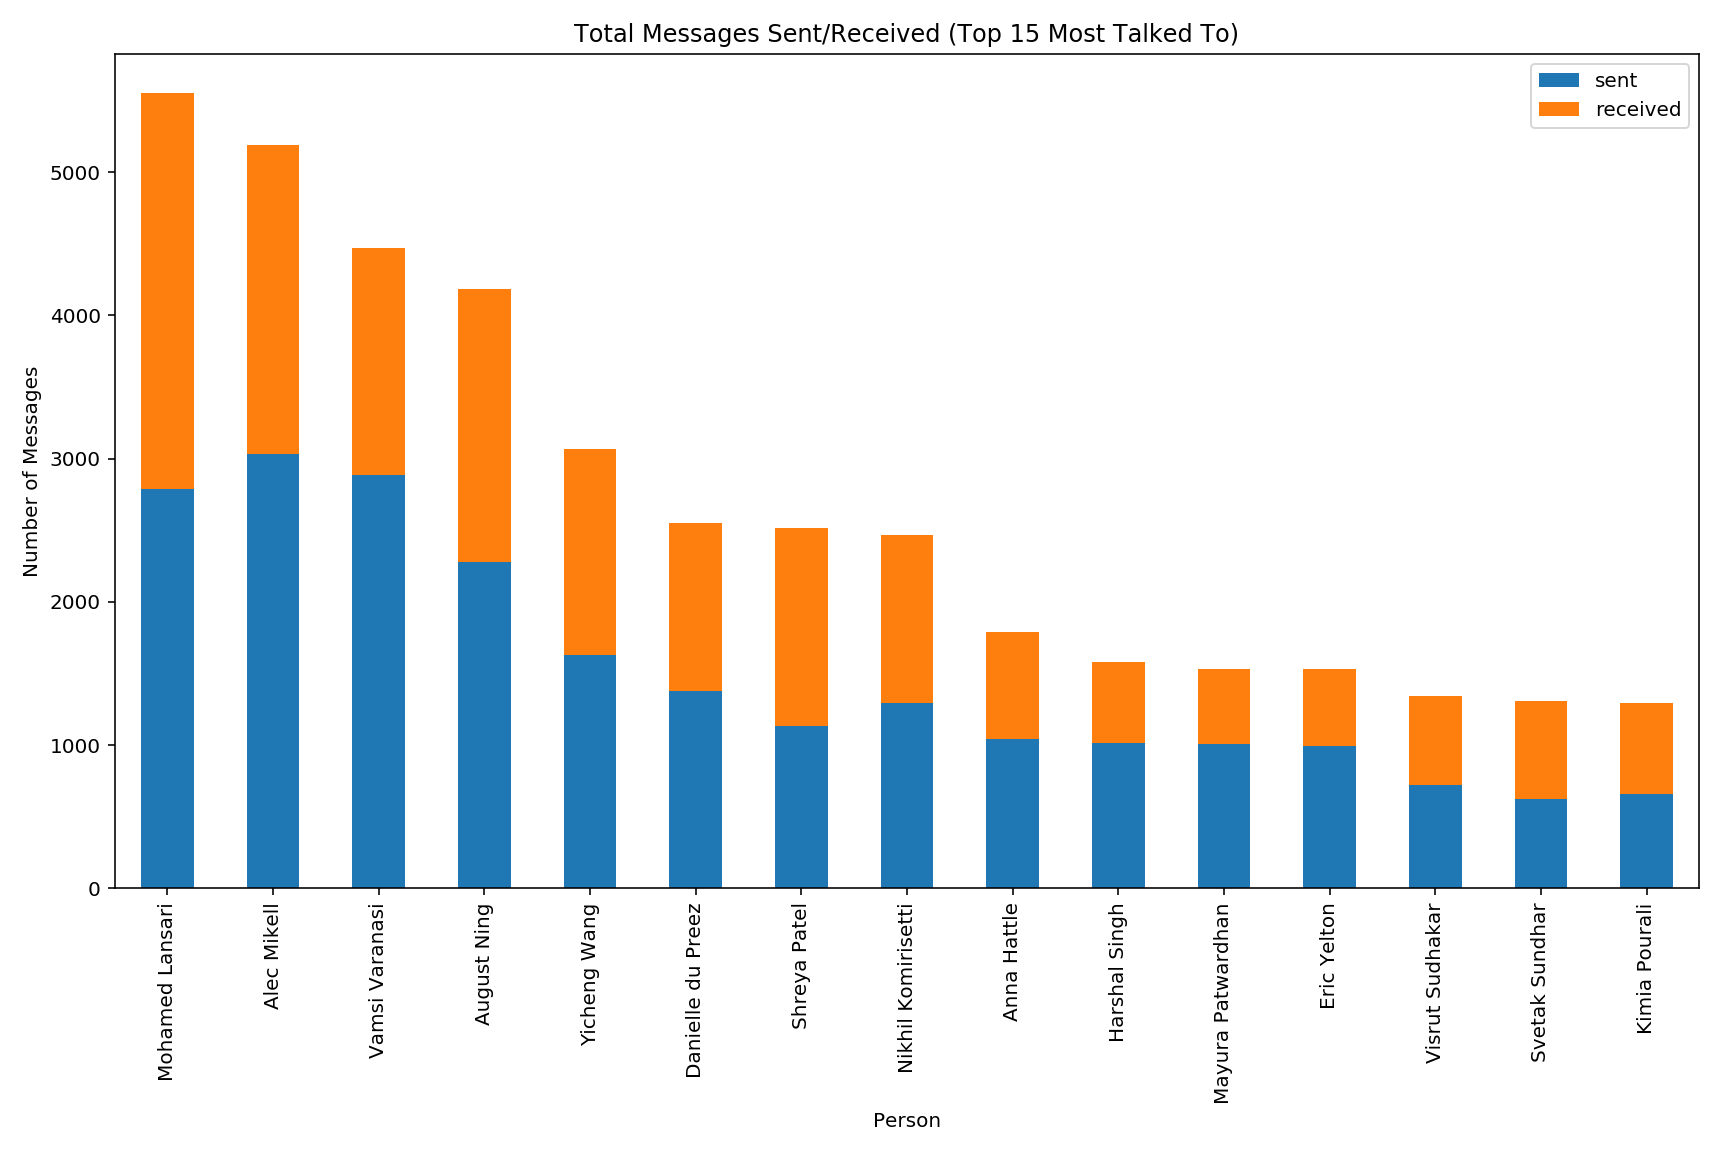

In [131]:
plt_total_me = df_total_me[:Num_People_To_Graph+5].plot.bar(title="Total Messages Sent/Received (Top "+ str(Num_People_To_Graph+5) + " Most Talked To)", stacked=True, figsize=(12, 8))
plt_total_me.set_ylabel("Number of Messages")
plt_total_me.set_xlabel("Person")
plt.tight_layout()

plt_total_me.get_figure().savefig("graphs/total_sent_received.png", bbox_inches='tight')

In [132]:
#Made by your boy Armaan, if you got any cool ideas hit him up...or Fork/Pull Request --> you know the deal

In [137]:
df_mpt.sum(axis = 1)
df_mpt.index = df_mpt.index.astype(int)
df_mpt = df_mpt.sort_index()
df_mpt

,Jacob D Fisher,Amogh Sharma,Rebecca Li,Meera Deva,Timothy Lo,Neil Davis,Jon Kaplan,Serena Singh,Julie Son,Eric Yelton,...,Elisa Moore,Rohan Prabhu,Vikas Vannappagari,Mayura Patwardhan,Ryan Ma,Jaspal Singh,Harshal Singh,Eric Li,Nikhil Komirisetti,Austin Wang
0,1,0,0,0,0,0,0,0,0,97,...,0,0,77,79,0,13,60,0,243,24
1,0,0,0,0,0,0,1,0,0,49,...,0,0,7,10,0,3,176,0,59,17
2,0,0,1,0,0,0,0,0,0,4,...,0,0,3,8,1,10,38,0,0,20
3,0,0,0,0,0,0,0,0,0,3,...,0,0,2,3,1,5,3,22,0,4
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,3
6,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,7,2,0,3,0,10,1
8,0,0,0,0,0,0,0,0,0,5,...,0,0,1,4,0,0,7,0,19,0
9,0,0,1,4,0,2,0,0,0,28,...,0,0,1,12,3,1,10,0,8,1


<IPython.core.display.Javascript object>


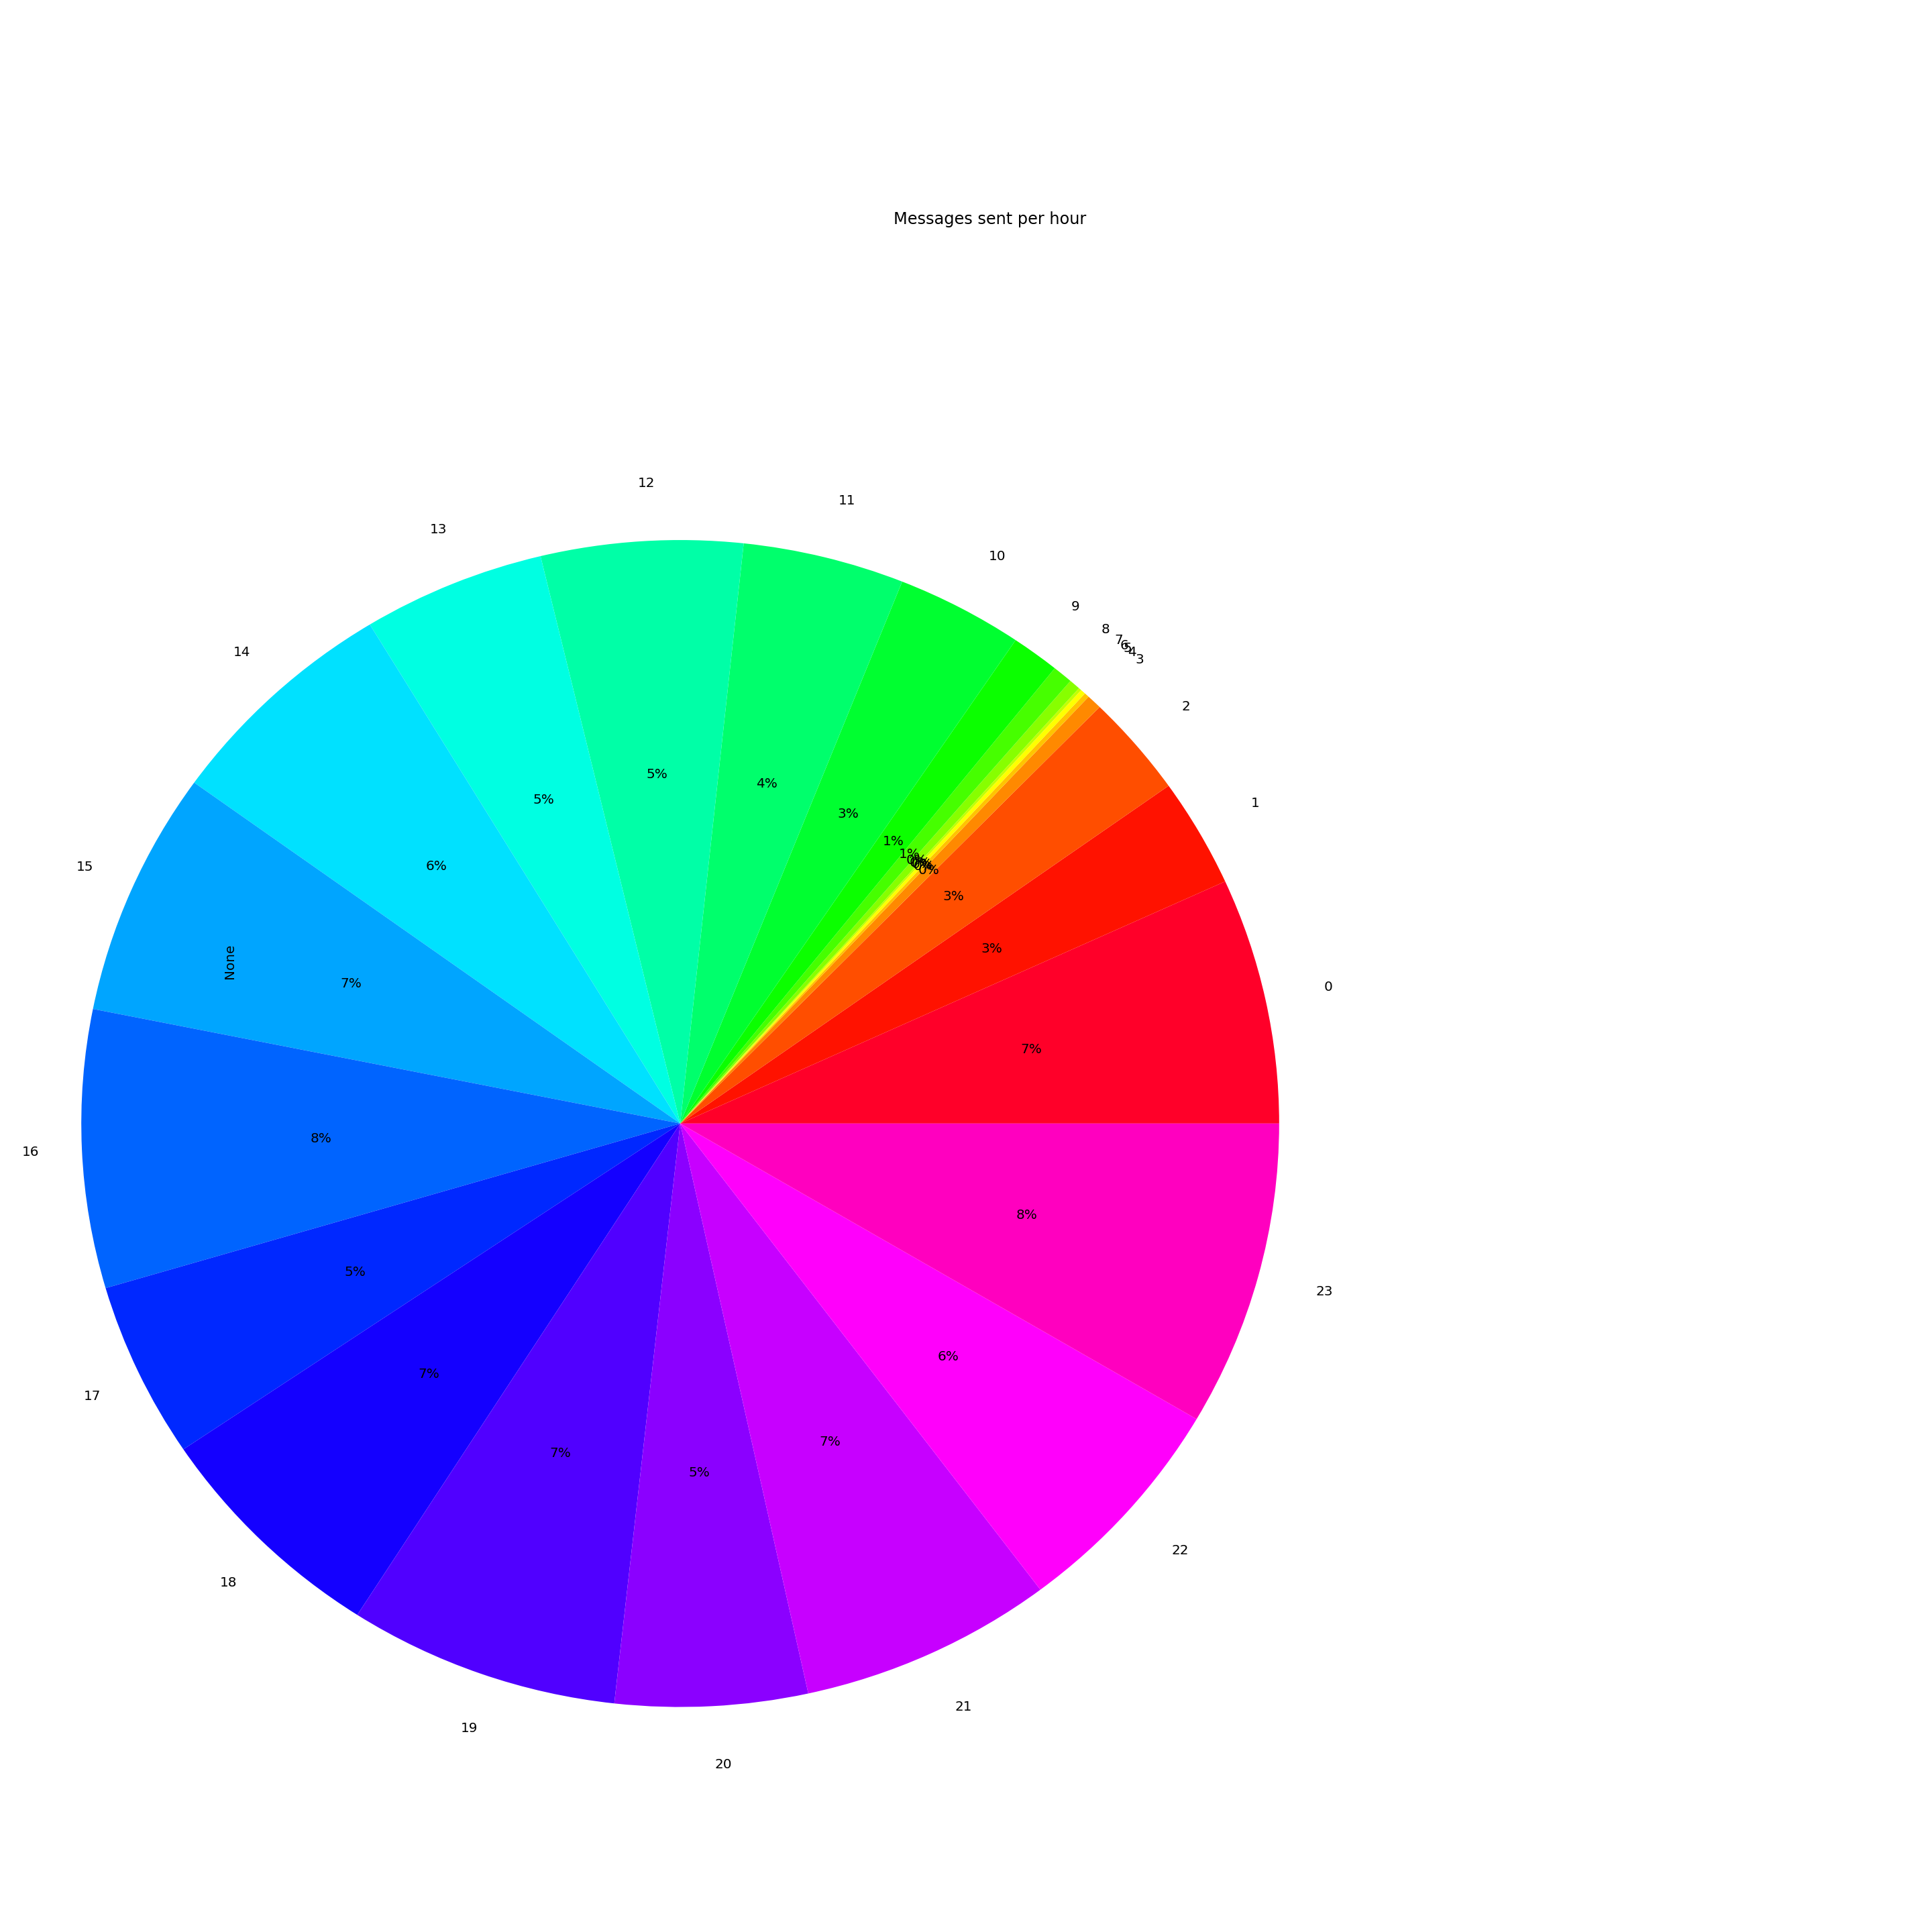

In [185]:
plt_mpt = plt.figure(figsize = (20,20))
# ax = plt.subplot2grid((12, 10), (0, 0), colspan=10, rowspan=10)
df_mpt.sum(axis=1).plot.pie(title= "Messages sent per hour", center = (4, 0), colors = colors, explode = [0.0]*24, autopct='%1.0f%%')
cmap = plt.get_cmap('gist_rainbow') # maybe improve this somehow?
colors = cmap(np.linspace(0, 1.0, 24))

# ax2 = plt.subplot2grid((12,10), colspan=2)
# ax2 = ax = df_mpt.sum(axis=1).plot.pie(title= "Messages sent per hour", center = (4, 0), colors = colors, explode = [0.0]*24, autopct='%1.0f%%')
